# Linear Regression
- ML Algorithm based on supervised learning that is commonly used for predictive analysis.
- Used to determine the linear relationship between the dependent variable (y) and independent variable (x). This linear relationship is represented by a straight line called regression line / best-fit line. This line is the pattern on which the machine has learned from the data.
- Used for predicting the output of quantitative type (continuous value) eg. Age, salary, price etc.

##### Simple Linear Regression:
- one X variable and one Y variable
- Formula: **y = mx + c**
        y is the response or target variable   
        x is the predictor variable
        m is the coefficient of x
        c is the intercept


##### Multiple Linear Regression:
- one Y variable and two or more X variable
- Formula: **y = m1x1 + m2x2.....+ mnxn**
        y is the target variable
        x1, x2, x3..xn represents the features.
        m1, m2, m3....mn are the coefficients of each feature ie., x1, x2, x3.. respectively.
        
       
## Cost Function
* It is a function that signifies how much the predicted values are deviated from the actual values.<br>
* MSE is the most commonly used cost function for Linear Regression. MSE is average of the sum of squared difference between the predicted and actual value. Output of MSE is the single number representing the cost.


# Gradient Descent
* It is an optimization algorithm used for minimizing the cost function. It's based on a convex function and tweaks its parameters iteratively to minimize a given function to its global minimum. It helps to get optimal value for the slope m which provides the best fit line.<br>
* Our aim is to minimize the error between the predicted values and the actual values.<br>


* The gradient descent curve has the cost function and slope values. This algorithm intially starts with a randomnly selected m value and from there it uses calculus to iteratively adjust the values of m and calculate cost function for all the slopes. So it takes all the error value and search for minimum error.  Once it finds the m that has minimum error, it creates a best fit line using that m.

* For the randomly selected m, it might not result in global minimum. So we need to move down and for that we use convergence theorem

* Learning rate should be a small value ranging between 0.1 to 0.0000001.

* To find the derivative of slope, we need to draw a tangent from that point.

* If the right-hand side of the tangent is facing towards down then its a negative slope. So the derivative of that slope will also be negative. Hence we need to increase the m value to move towards the global minima.

* If the right-hand side of the tangent faces towards the left, then its a positive slope. So the derivative of the slope will be positive. We need to reduce the m value so it will move towards the global minima.

### $R^2$ statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1.
In simple words, it represents how much of our data is being explained by our model.
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.
Mathematically $R^2$ statistic is calculated as :
<img src="RSquared.PNG" width="300">
                                              
Where RSS:  is  the Residual Sum of squares and is given as :
<img src="RSS.PNG">
                                                                
RSS is the residual(error) term we have been talking about so far.
And, TSS:  is  the Total sum of squares and given as :
<img src="TSS.PNG">
                                                             
TSS is calculated when we consider the line passing through the mean value of y, to be the best fit line.
Just like RSS, we calculate the error term when the best fit line is the line passing through the mean value of y and we get the value of TSS.
    <img src="TSS2.PNG">
    
The closer the value of R2 is to 1 the better the model fits our data. If R2 comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.


### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.
Let’s understand this with an example:

<img src="adjr.PNG" width="300">
We can see that R2 always increases with an increase in the number of independent variables.
Thus, it doesn’t give a better picture and so we need Adjusted R2 value to keep this in check.
Mathematically, it is calculated as:
                                        <img src="adjr2.PNG">
In the equation above, when p = 0, we can see that adjusted R2 becomes equal to R2.
Thus, adjusted R2  will always be less than or equal to R2, and it penalises the excess of independent variables which do not affect the dependent variable.


## Business Case:-Prediciting the chances of admission with given features

# Project Description

This project focuses on building a linear regression model to predict the chance of admission for prospective graduate students based on various factors. The dataset includes features such as GRE Score, TOEFL Score, University Rating, Statement of Purpose (SOP) strength, Letter of Recommendation (LOR) strength, Cumulative Grade Point Average (CGPA), and Research experience.

The goal is to develop a model that can accurately estimate the probability of admission, which can be a valuable tool for both applicants assessing their chances and universities evaluating candidates.

The project involved the following steps:
- Loading and exploring the dataset to understand the features and identify missing values.
- Performing basic checks and domain analysis of the features.
- Conducting univariate, bivariate, and multivariate analysis to understand the relationships between variables.
- Preprocessing the data by handling missing values and scaling numerical features.
- Selecting relevant features for the model.
- Building and evaluating a linear regression model.
- Exploring techniques to improve model accuracy, including analyzing assumptions, feature selection with RFE, regularization (Ridge, Lasso, Elastic Net), polynomial features, and cross-validation.
- Analyzing residuals to understand model performance.

# Import basic libraries

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# load dataset

In [2]:
## Importing data
data=pd.read_excel('Admission_Prediction.xlsx')

In [3]:
## Getting the some rows of data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


## Basic understanding of features-- Domain Analysis
GRE Score:-The graduate record examination (GRE) is a standardized exam used to measure one's aptitude for abstract thinking in the areas of analytical writing, mathematics, and vocabulary. The GRE is commonly used by many graduate schools in the U.S. and Canada to determine an applicant's eligibility for the program.

TOEFL Score:-TOFEL Score is a standardized test to measure the English language ability of non-native speakers wishing to enroll in English-speaking universities.

University Rating:-Rating of university

SOP:-Statement of Purpose, a reflection of your personality that you portray in front of the admission committee (Adcom) for getting enrolled in universities abroad.


LOR:-Letter of Recommendation.The LOR is a document that provides the admission officers with a comprehensive insight into your suitable candidature, for admission into the concerned University.

CGPA:-CGPA stands for Cumulative Grade Points Average. CGPA is nothing but the average of grade points obtained by students in all the subjects excluding the 6th subject.

Research:-Whether the student has done the research or not

Chance of Admit:-Target variable and we need to claculate percentage of getting admission.

## Basic Checks

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.shape

(500, 9)

In [6]:
data.describe()
## Serial No is unique identity of the dataset.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data.info()
## There seems to be missing values in GRE,TOFEL,UR features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [8]:
#print all columns
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [9]:
#dtypes
data.dtypes

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# Insights
* There seems to be missing values in GRE,TOFEL,UR features
* Serial No is unique identity of the dataset.

## Exploratory Data Analysis

### Univariate Analysis-- Analyzing single variable

In [10]:
## Renaming certain columns just to make analysis easy
data.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score',
                     'University Rating':'University_Rating',
                     'Chance of Admit':'Chance_of_Admit'}
            ,inplace=True)

In [11]:
data.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

C:\Users\AK\AppData\Local\Temp\ipykernel_7264\816103153.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.GRE_Score.dropna(axis=0))


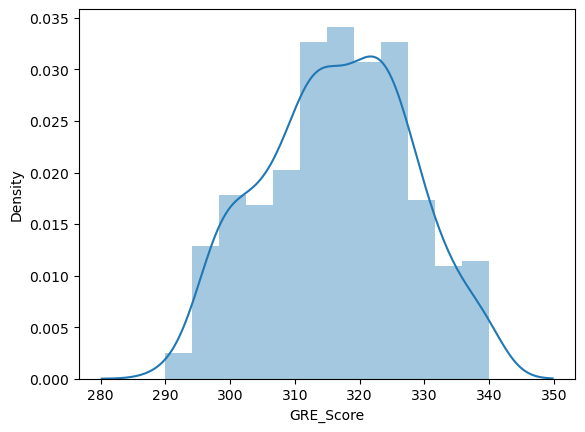

In [12]:
## ANalyszing GRE Score

sns.distplot(data.GRE_Score.dropna(axis=0))
## Normal distribution
## The data is concentrated between 310 to 330.
plt.show()

In [13]:
## ANalsyzing TOEFL_Score
sns.distplot(data.TOEFL_Score.dropna(axis=0))
## Normally distributed.

C:\Users\AK\AppData\Local\Temp\ipykernel_7264\3722236297.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.TOEFL_Score.dropna(axis=0))


<Axes: xlabel='TOEFL_Score', ylabel='Density'>

In [14]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [15]:
## Analaysizng University_Rating
##sns.distplot(data.University_Rating.dropna(axis=0))
#3sns.countplot(x='University_Rating',data=data)
data.University_Rating.value_counts()
## Most of the university has rating of 3.
## 72 universities seems to be good one.
## 32 universities are worst performing.

University_Rating
3.0    154
2.0    124
4.0    103
5.0     72
1.0     32
Name: count, dtype: int64

In [16]:
## Analayzing SOP
##data.SOP.value_counts()
## There are very less students who are able to impress the admission committee
sns.countplot(x='SOP',data=data)

<Axes: xlabel='TOEFL_Score', ylabel='Density'>

In [17]:
## Analysizng LOR
##data.LOR.value_counts()
## Average candidates have applied for admission.
sns.countplot(x='LOR',data=data)

<Axes: xlabel='TOEFL_Score', ylabel='Density'>

In [18]:
## Analyzing CGPA
sns.distplot(data.CGPA)
## Most of students have CGPA in range of 8 to 9.

C:\Users\AK\AppData\Local\Temp\ipykernel_7264\2805775537.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.CGPA)


<Axes: xlabel='CGPA', ylabel='Density'>

In [19]:
## Analyzing  Research
sns.countplot(x='Research',data=data)
## The distribution seems to be balanced however the
##students done research are more.

<Axes: xlabel='CGPA', ylabel='Density'>

In [20]:
## Analsyzing target variable
sns.distplot(data.Chance_of_Admit)

C:\Users\AK\AppData\Local\Temp\ipykernel_7264\375916189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Chance_of_Admit)


<Axes: xlabel='Chance_of_Admit', ylabel='Density'>

# Insights
*

### Bivariate Analysis-->Analyzing 2 variables at a time.

In [21]:
data1=data[['GRE_Score', 'TOEFL_Score', 'University_Rating',
            'SOP','LOR', 'CGPA', 'Research']]

In [22]:
data1

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,NaN,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


In [23]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data1:#accessing the columns
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graph
        sns.scatterplot(x=data1[column].dropna(axis=0)#scatter plot
                        ,y=data.Chance_of_Admit)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Chance_of_Admit',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

# Insights
* Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

##  Multivariate Analysis

In [24]:
# Plotting the distribution of columns
sns.pairplot(data)

## Data Preprocessing

In [25]:
## Checking missing values
data.isnull().sum()

Serial No.            0
GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit       0
dtype: int64

In [26]:
## Imputing the missing values
## Since GRE score,TOEFL score has shown normal distribution so mean can be better substitute to impute missing values.
## University rating is ordinal data so mode imputation can be used.

In [27]:
## Getting the rows where values got missed
data.loc[data['GRE_Score'].isnull()==True]

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
12,13,NaN,112.0,4.0,4.0,4.5,9.10,1,0.78
23,24,NaN,119.0,5.0,5.0,4.5,9.70,1,0.95
36,37,NaN,106.0,2.0,4.0,4.0,8.40,0,0.64
51,52,NaN,100.0,2.0,1.5,3.5,7.90,1,0.56
70,71,NaN,118.0,5.0,5.0,5.0,9.64,1,0.94
124,125,NaN,106.0,4.0,2.5,3.0,8.47,0,0.57
155,156,NaN,109.0,3.0,3.0,3.0,8.69,0,0.77
182,183,NaN,100.0,2.0,3.0,3.5,7.88,0,0.68
218,219,NaN,110.0,4.0,3.0,3.5,8.97,1,0.84


In [28]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [29]:
from scipy import stats
stats.mode(data.University_Rating)

ModeResult(mode=3.0, count=154)

In [30]:
## Impuation using inbuild method fillna.
data['University_Rating'] = data['University_Rating'].fillna(data['University_Rating'].mode()[0])

data['TOEFL_Score'] = data['TOEFL_Score'].fillna(data['TOEFL_Score'].mean())

data['GRE_Score']  = data['GRE_Score'].fillna(data['GRE_Score'].mean())

In [31]:
data.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [32]:
data.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [33]:
# check for duplicates
data.duplicated().sum()

0

# checking for outlier

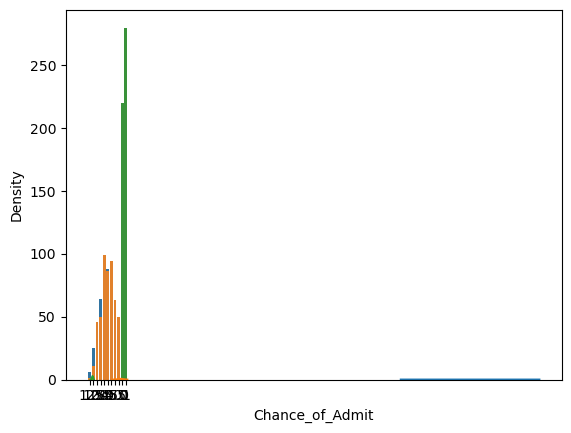

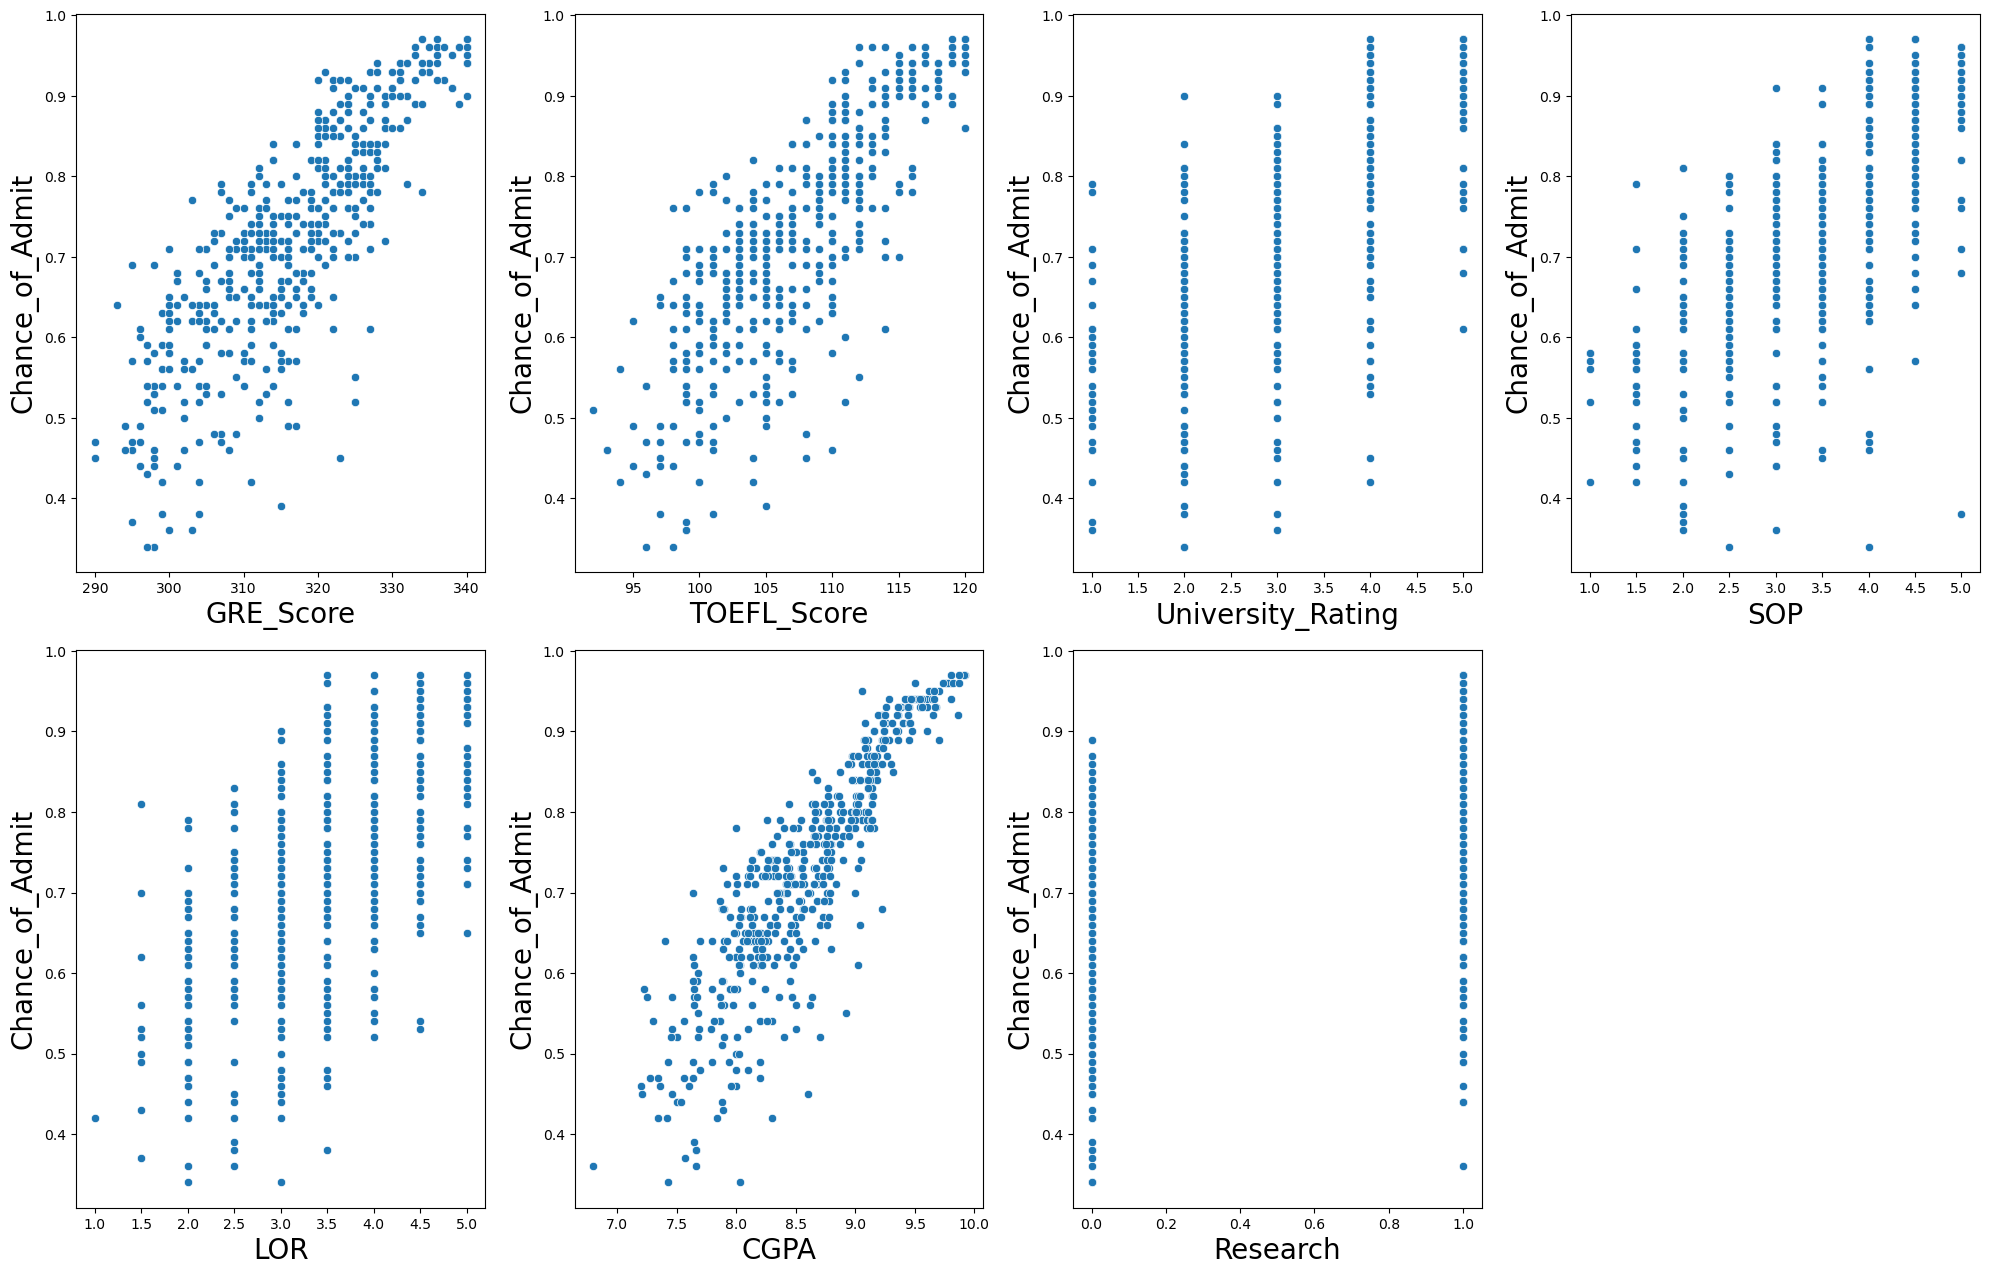

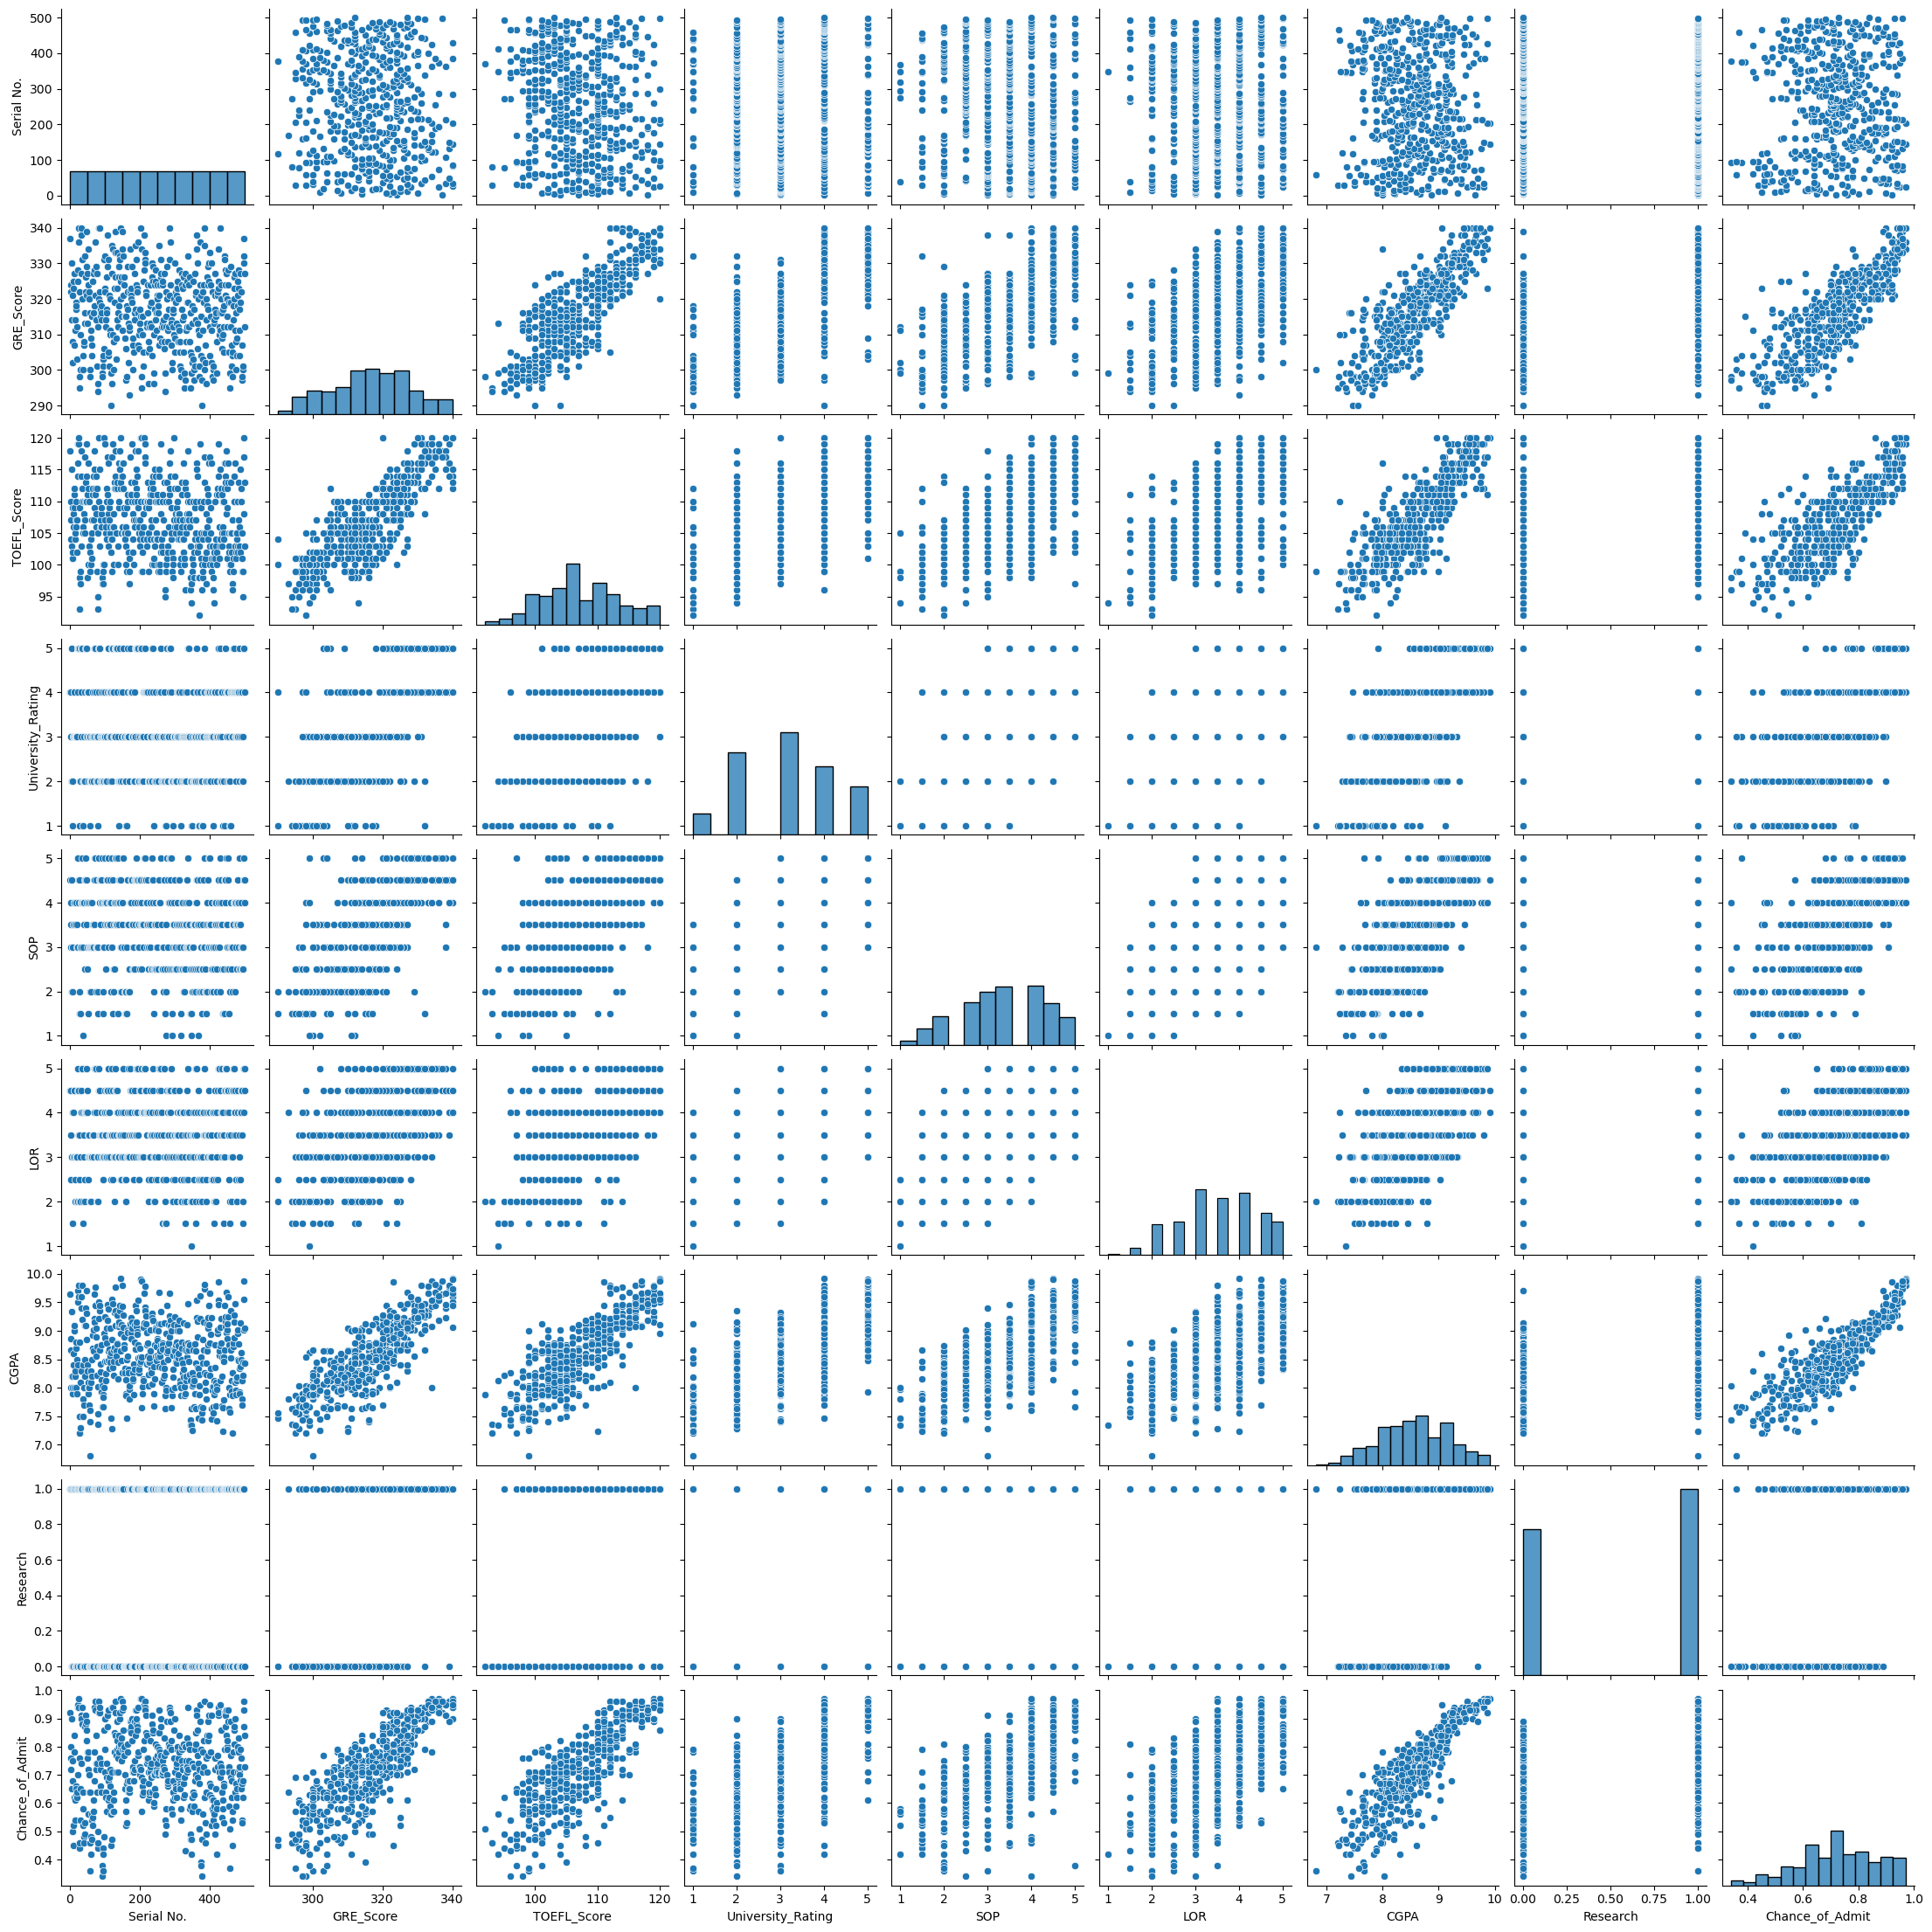

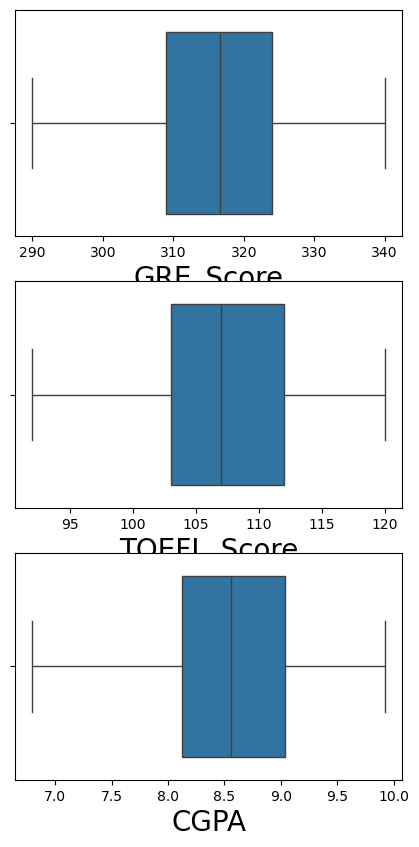

In [34]:
## Lets check outliers in any
box=data[['GRE_Score', 'TOEFL_Score','CGPA']]
plt.figure(figsize=(5,10), facecolor='white')#to sey canvas size
plotnumber = 1#counter

for column in box:#acc
    if plotnumber<=6 : # as there are 9 columns in the data
        ax = plt.subplot(3,1,plotnumber)#plotting 3 graphs
        sns.boxplot(x=box[column])#boxplot to check for outlier
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1#counter increment
plt.show()#to show plot

In [35]:
## There seems to be no outliers

In [36]:
## Skweness and Kurtosis test i.e check for normality
from scipy import stats
for column in box:
    print(stats.skew(box[column]),column)

-0.05231732520434785 GRE_Score
0.1027880861342189 TOEFL_Score
-0.02653261314181717 CGPA


In [37]:
for column in box:
    print(stats.kurtosis(box[column]),column)

-0.6183261354443954 GRE_Score
-0.6224728502117052 TOEFL_Score
-0.5676573553864674 CGPA


In [38]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


#Feature Engineering
* drop irrelevant columns
* Selecting best features
* drop the column which has very correlation with target varibles

In [39]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='Blues',annot=True)

<Axes: >

## Feature Scaling

In [40]:
## Scaling the data.As we will implement linear regression so we need to make all numerical features into same sacle.
## From the EDA stage we have found all numericla variables are normally distributed so we can apply
## Standard scaler.

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
data[['GRE_Score', 'TOEFL_Score','CGPA']]= sc.fit_transform(data[['GRE_Score', 'TOEFL_Score','CGPA']])

In [42]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,1.842741e+00,1.788542,4.0,4.5,4.5,1.776806,1,0.92
1,2,6.708143e-01,-0.031058,4.0,4.0,4.5,0.485859,1,0.76
2,3,5.124333e-15,-0.527313,3.0,3.0,3.5,-0.954043,1,0.72
3,4,4.905178e-01,0.465197,3.0,3.5,2.5,0.154847,1,0.80
4,5,-2.306679e-01,-0.692731,2.0,2.0,3.0,-0.606480,0,0.65


## Feature Selection

In [43]:
## Feature selection is done to get that specific features which are important to predict the
## the target varaible.

## First remove the redundant colunms i.e serial no,customer id,ids
## In second step remove constant columns,the columns not providing information.
## i.e standard deviation=0

In [44]:
## Dropping columns that are not required
data.drop(['Serial No.'],axis=1,inplace=True)

In [45]:
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.842741e+00,1.788542,4.0,4.5,4.5,1.776806,1,0.92
1,6.708143e-01,-0.031058,4.0,4.0,4.5,0.485859,1,0.76
2,5.124333e-15,-0.527313,3.0,3.0,3.5,-0.954043,1,0.72
3,4.905178e-01,0.465197,3.0,3.5,2.5,0.154847,1,0.80
4,-2.306679e-01,-0.692731,2.0,2.0,3.0,-0.606480,0,0.65


In [46]:
## Third step is Checking correlation i.e checking the linear relation between 2 variables.
sns.heatmap(data.drop('Chance_of_Admit',axis=1).corr(),annot=True)

<Axes: >

In [47]:
## There seems to be relationship between GRE and TOFEL score,CGPA however the relationship is not
# that strong.So we will not drop further any features

## Model Building

In [48]:
## Defining independent and dependent variables
X=data.iloc[:,0:-1]
y=data.Chance_of_Admit

In [49]:
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.842741e+00,1.788542,4.0,4.5,4.5,1.776806,1,0.92
1,6.708143e-01,-0.031058,4.0,4.0,4.5,0.485859,1,0.76
2,5.124333e-15,-0.527313,3.0,3.0,3.5,-0.954043,1,0.72
3,4.905178e-01,0.465197,3.0,3.5,2.5,0.154847,1,0.80
4,-2.306679e-01,-0.692731,2.0,2.0,3.0,-0.606480,0,0.65


In [50]:
X=data.iloc[:,0:7] ## independent variables
y=data.Chance_of_Admit ## dependent or target variable.

In [51]:
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1.842741e+00,1.788542,4.0,4.5,4.5,1.776806,1
1,6.708143e-01,-0.031058,4.0,4.0,4.5,0.485859,1
2,5.124333e-15,-0.527313,3.0,3.0,3.5,-0.954043,1
3,4.905178e-01,0.465197,3.0,3.5,2.5,0.154847,1
4,-2.306679e-01,-0.692731,2.0,2.0,3.0,-0.606480,0
...,...,...,...,...,...,...,...
495,1.392000e+00,0.134360,5.0,4.5,4.0,0.734118,1
496,1.842741e+00,1.623124,5.0,5.0,5.0,2.140919,1
497,1.211704e+00,2.119379,5.0,4.5,5.0,1.627851,1
498,-4.109644e-01,-0.692731,4.0,4.0,5.0,-0.242367,0


In [52]:
## Definiging training and testing data, on training data, model will be created.Now to evaluate the
## model,testing data is required.However on production you will have unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)


In [53]:
## Model creation
from sklearn.linear_model import LinearRegression ## importing the model library

LR=LinearRegression() ## creating the model object
LR.fit(X_train,y_train) ## fitting the training data.

y_hat=LR.predict(X_test) ## prediciton from model

In [54]:
y_h=LR.predict(X_train)

## Model Evaluation

In [55]:
#Predict the response for test dataset
pred=LR.predict(X_test)

In [56]:
# Accuracy of Model
print(f'Accuracy : {LR.score(X_test,y_test)*100} %')

Accuracy : 81.15407620989185 %


In [57]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


train_score=r2_score(y_train,y_h)
train_score

0.8215743239739608

In [58]:
test_score=r2_score(y_test,y_hat)
test_score

0.8115407620989186

In [59]:
# Mean Squared Error & Mean Absolute Error
print("MSE: ", mean_squared_error(y_test, y_hat))
print("MAE: ", mean_absolute_error(y_test, y_hat))

MSE:  0.0037491628485870187
MAE:  0.04213100665178647


In [60]:
# RMSE
import math
print(math.sqrt(mean_squared_error(y_test,y_hat))) # root mean squared error

0.061230407875393245


In [61]:
X_train.shape,X_test.shape

((375, 7), (125, 7))

In [62]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.82)*(375-1)/(375-7-1)
train_adjusted_r2

0.816566757493188

In [63]:
test_adjusted_r2= 1-(1-0.81)*(125-1)/(125-7-1)
test_adjusted_r2

0.7986324786324787

In [64]:
print('intercept:', LR.intercept_) ## c value

intercept: 0.6419653811558613


In [65]:
print('slope:', LR.coef_) ## m0,m1,m2,m3,m4,m5,m6

slope: [0.01889429 0.02000701 0.00142173 0.00359397 0.01499597 0.07598586
 0.02236729]


**Assumptions of Linear Regression:**<br>
    - Linearity: Linear relationship exist between dependent and independent variable. In case of non-linearity, use transformation such as logarthmic, exponential, square root etc <br>
    - No multicollinearity: If there is multicollinearity its unclear which independent variable explains the dependent variable. <br>
    - Errors are normally distributed. If not, then confidence interval may become too wide or narrow.

**Pros:**<br>
    - Simple method<br>
    - Easy to use and understand<br>
    
**Cons**<br>
    - Very sensitive to outliers : often leads to model with low accuracy<br>
    - It performs well for linearly seperable datasets. So not recommended for most real world applications as it produces simplified results assuming linear relationship between the data.


# Improve the accuracy of the current linear regression model.

## Analyze model assumptions

Check if the assumptions of linear regression (linearity, independence of errors, homoscedasticity, normality of errors) are met. If not, consider transformations or using a different model.



* Create a scatter plot of predicted vs actual values to assess linearity and homoscedasticity, calculate residuals, and then plot the residuals against predicted values and create a QQ plot of residuals to check for homoscedasticity and normality of errors.



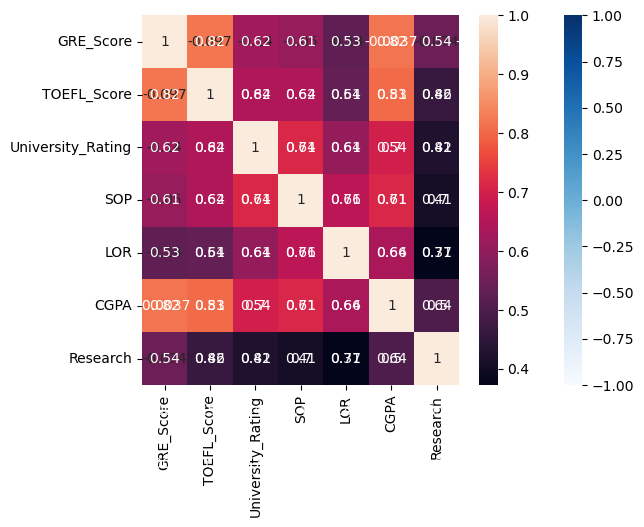

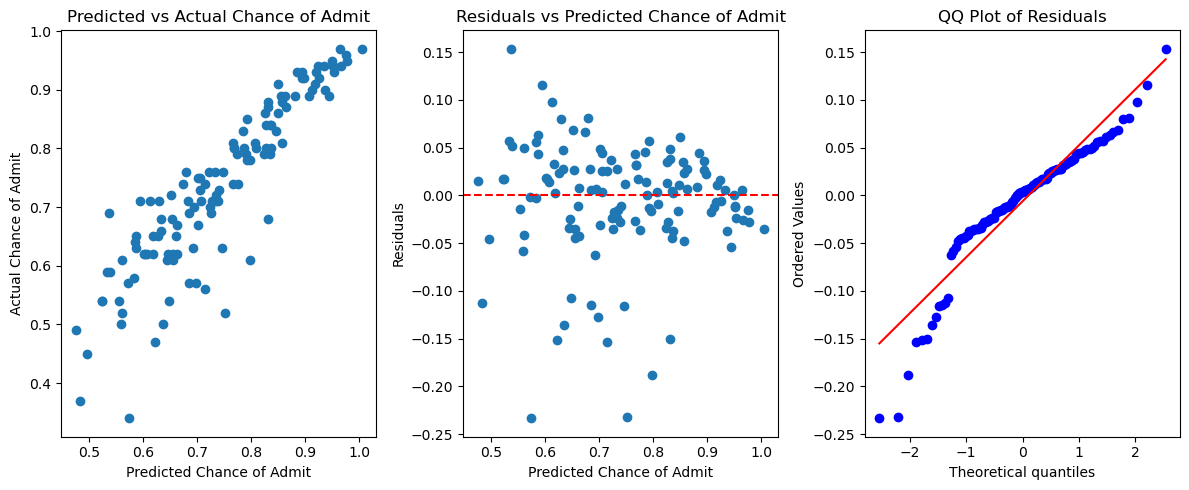

In [66]:
plt.figure(figsize=(12, 5))

# Plotting predicted vs actual values
plt.subplot(1, 3, 1)
plt.scatter(y_hat, y_test)
plt.xlabel("Predicted Chance of Admit")
plt.ylabel("Actual Chance of Admit")
plt.title("Predicted vs Actual Chance of Admit")

# Calculate residuals
residuals = y_test - y_hat

# Plotting residuals vs predicted values
plt.subplot(1, 3, 2)
plt.scatter(y_hat, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Chance of Admit")

# QQ plot of residuals
plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

## Feature selection

* Experiment with different feature selection methods to identify the most impactful features for the model.



* Use RFE to select the top features for the linear regression model.



In [67]:
from sklearn.feature_selection import RFE

# Initialize RFE with the linear regression model and specify the number of features to select
# We will try selecting 5 features initially
rfe = RFE(estimator=LR, n_features_to_select=5)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]

print("Selected features using RFE:", selected_features_rfe)

Selected features using RFE: Index(['GRE_Score', 'TOEFL_Score', 'LOR', 'CGPA', 'Research'], dtype='object')



* Train a new linear regression model using the features selected by RFE and evaluate its performance.



In [68]:
# Train a linear regression model using only the selected features
X_train_selected = X_train[selected_features_rfe]
X_test_selected = X_test[selected_features_rfe]

LR_selected = LinearRegression()
LR_selected.fit(X_train_selected, y_train)

# Predict on the test set using the new model
y_hat_selected = LR_selected.predict(X_test_selected)

# Evaluate the performance of the new model
test_score_selected = r2_score(y_test, y_hat_selected)
mse_selected = mean_squared_error(y_test, y_hat_selected)
mae_selected = mean_absolute_error(y_test, y_hat_selected)
rmse_selected = np.sqrt(mse_selected)

print("R-squared on test set with selected features:", test_score_selected)
print("MSE on test set with selected features:", mse_selected)
print("MAE on test set with selected features:", mae_selected)
print("RMSE on test set with selected features:", rmse_selected)

# Compare with the performance of the model trained on all features
print("\nPerformance with all features:")
print("R-squared on test set:", test_score)
print("MSE on test set:", mean_squared_error(y_test, y_hat))
print("MAE on test set:", mean_absolute_error(y_test, y_hat))
print("RMSE on test set:", np.sqrt(mean_squared_error(y_test, y_hat)))

R-squared on test set with selected features: 0.8100373307777472
MSE on test set with selected features: 0.0037790717504668837
MAE on test set with selected features: 0.04224164513645406
RMSE on test set with selected features: 0.06147415514235949

Performance with all features:
R-squared on test set: 0.8115407620989186
MSE on test set: 0.0037491628485870187
MAE on test set: 0.04213100665178647
RMSE on test set: 0.061230407875393245


## Regularization

* Implement regularization techniques  to prevent overfitting and potentially improve accuracy.



* Implement Lasso, Ridge, and Elastic Net regression models and evaluate their performance to see if regularization improves accuracy compared to the original linear regression model.



In [69]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Instantiate and train Ridge model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_hat_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model
ridge_r2 = r2_score(y_test, y_hat_ridge)
ridge_mse = mean_squared_error(y_test, y_hat_ridge)
ridge_mae = mean_absolute_error(y_test, y_hat_ridge)

print("Ridge Model Performance:")
print("R-squared:", ridge_r2)
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)

# Instantiate and train Lasso model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_hat_lasso = lasso_model.predict(X_test)

# Evaluate Lasso model
lasso_r2 = r2_score(y_test, y_hat_lasso)
lasso_mse = mean_squared_error(y_test, y_hat_lasso)
lasso_mae = mean_absolute_error(y_test, y_hat_lasso)

print("\nLasso Model Performance:")
print("R-squared:", lasso_r2)
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)

# Instantiate and train ElasticNet model
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train, y_train)
y_hat_elastic_net = elastic_net_model.predict(X_test)

# Evaluate ElasticNet model
elastic_net_r2 = r2_score(y_test, y_hat_elastic_net)
elastic_net_mse = mean_squared_error(y_test, y_hat_elastic_net)
elastic_net_mae = mean_absolute_error(y_test, y_hat_elastic_net)

print("\nElasticNet Model Performance:")
print("R-squared:", elastic_net_r2)
print("MSE:", elastic_net_mse)
print("MAE:", elastic_net_mae)

# Compare with the original Linear Regression model performance
print("\nOriginal Linear Regression Model Performance:")
print("R-squared:", test_score)
print("MSE:", mean_squared_error(y_test, y_hat))
print("MAE:", mean_absolute_error(y_test, y_hat))

Ridge Model Performance:
R-squared: 0.8117109628563143
MSE: 0.0037457769155675694
MAE: 0.042123375157288194

Lasso Model Performance:
R-squared: -0.020267983528503786
MSE: 0.020296966400000005
MAE: 0.11799616000000002

ElasticNet Model Performance:
R-squared: -0.020267983528503786
MSE: 0.020296966400000005
MAE: 0.11799616000000002

Original Linear Regression Model Performance:
R-squared: 0.8115407620989186
MSE: 0.0037491628485870187
MAE: 0.04213100665178647


## Polynomial features

* Explore adding polynomial features to capture non-linear relationships in the data.


* Transform the independent variables to include polynomial features, train a linear regression model on these features, and evaluate its performance.



In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on polynomial features
LR_poly = LinearRegression()
LR_poly.fit(X_train_poly, y_train)

# Predict on the test set with polynomial features
y_hat_poly = LR_poly.predict(X_test_poly)

# Evaluate the performance of the polynomial features model
test_score_poly = r2_score(y_test, y_hat_poly)
mse_poly = mean_squared_error(y_test, y_hat_poly)
mae_poly = mean_absolute_error(y_test, y_hat_poly)

print("Polynomial Features Model Performance:")
print("R-squared:", test_score_poly)
print("MSE:", mse_poly)
print("MAE:", mae_poly)

# Compare with the original Linear Regression model performance
print("\nOriginal Linear Regression Model Performance:")
print("R-squared:", test_score)
print("MSE:", mean_squared_error(y_test, y_hat))
print("MAE:", mean_absolute_error(y_test, y_hat))

Polynomial Features Model Performance:
R-squared: 0.8261975527491325
MSE: 0.003457584173021416
MAE: 0.03994844639248846

Original Linear Regression Model Performance:
R-squared: 0.8115407620989186
MSE: 0.0037491628485870187
MAE: 0.04213100665178647


## Analyze residuals

* Analyze the residuals (the differences between predicted and actual values) to identify any patterns or areas where the model is performing poorly.



* Calculate residuals and create residual plots to analyze model performance and check assumptions.



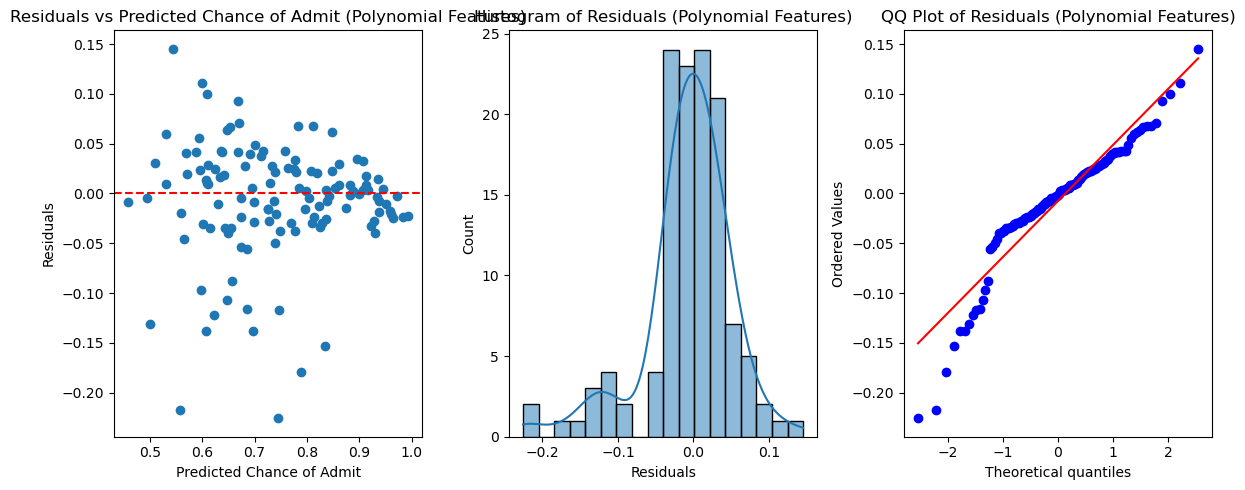

In [71]:
# Calculate the residuals
residuals = y_test - y_hat_poly

# Create a scatter plot of predicted values against residuals
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_hat_poly, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Chance of Admit (Polynomial Features)")

# Create a histogram of the residuals
plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals (Polynomial Features)")

# Create a Q-Q plot of the residuals
plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals (Polynomial Features)")

plt.tight_layout()
plt.show()

## Hyperparameter tuning





Perform hyperparameter tuning on the Ridge model using GridSearchCV to find the optimal alpha value and then evaluate the tuned model.



In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Instantiate Ridge model
ridge = Ridge()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best alpha value
print("Best alpha:", grid_search.best_params_)

# Train a new Ridge model with the best alpha
best_alpha = grid_search.best_params_['alpha']
tuned_ridge_model = Ridge(alpha=best_alpha)
tuned_ridge_model.fit(X_train, y_train)

# Predict on the test set
y_hat_tuned_ridge = tuned_ridge_model.predict(X_test)

# Evaluate the tuned Ridge model
tuned_ridge_r2 = r2_score(y_test, y_hat_tuned_ridge)
tuned_ridge_mse = mean_squared_error(y_test, y_hat_tuned_ridge)
tuned_ridge_mae = mean_absolute_error(y_test, y_hat_tuned_ridge)

print("\nTuned Ridge Model Performance:")
print("R-squared:", tuned_ridge_r2)
print("MSE:", tuned_ridge_mse)
print("MAE:", tuned_ridge_mae)

Best alpha: {'alpha': 10.0}

Tuned Ridge Model Performance:
R-squared: 0.8127456715241856
MSE: 0.0037251926696590157
MAE: 0.04204956918041192


## Cross-validation



* Use cross-validation to evaluate the performance of the linear regression model on the entire dataset.



In [73]:
from sklearn.model_selection import cross_val_score

# Use cross_val_score with the LinearRegression model and the entire dataset
cv_scores = cross_val_score(LR, X, y, cv=5, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-validation R-squared scores:", cv_scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean R-squared score:", np.mean(cv_scores))
print("Standard deviation of R-squared scores:", np.std(cv_scores))

Cross-validation R-squared scores: [0.67603962 0.79387055 0.85827332 0.81949067 0.89606845]
Mean R-squared score: 0.8087485231893948
Standard deviation of R-squared scores: 0.07486771699093278


# Conclusion

The linear regression model built on the admission prediction dataset achieved an initial R-squared score of approximately 0.81 on the test set, indicating that about 81% of the variance in the chance of admit can be explained by the features in the model.

Through the process of improving the model, several techniques were explored:
- Feature selection using RFE did not significantly improve the model's performance in terms of R-squared.
- Regularization with Ridge regression showed a slight improvement in R-squared, while Lasso and Elastic Net did not perform well with the default parameters.
- Adding polynomial features resulted in a noticeable improvement in the R-squared score, increasing it to approximately 0.83, suggesting that there may be non-linear relationships in the data.
- Hyperparameter tuning on the Ridge model using GridSearchCV found an optimal alpha of 10.0, leading to a small improvement in R-squared compared to the default Ridge model.
- Cross-validation provided a more robust evaluation of the linear regression model's performance across different subsets of the data, with a mean R-squared of approximately 0.81.
- Residual analysis for the polynomial features model showed a more centered distribution of residuals around zero, indicating a better fit compared to the initial linear regression model.

Based on the evaluation metrics, the model with polynomial features appears to be the most promising in predicting the chance of admission for this dataset, achieving the highest R-squared score and lowest MSE and MAE among the models tested. Further investigation into the degree of polynomial features and potential interactions between features could potentially lead to even better performance.